# 장애인콜택시 대기시간 예측
## 단계2. 탐색적 데이터 분석

## 0.미션

* 1.개별 변수 분석하기
    * 앞서 생성된 각 변수들 특히 추가로 생성한 변수들에 대해서 단변량 분석을 수행합니다. 
    * 시각화 : Histogram, Boxplot, Barplot
    * 통계량 : 기초 통계량.
    * [옵션] 날짜 요소 관점을 추가해서 EDA 를 수행하시오.
* 2.Features와 Target의 관계 분석하기
    * Target은 숫자입니다.
    * 숫자형 feature들과 Target 과의 관계
        * 한꺼번에 상관관계를 확인하는 방법을 이용하여 분석합시다.
    * 범주형 feature들과 Target
        * sns.barplot, t-검정, 분산분석 등을 이용하여 분석합니다.
    * Target과 관련이 높은 feature와 그렇지 않은 feature를 정리해 봅시다.

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
# path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [4]:
!pip install -r requirements.txt

  Using cached numpy-1.22.4.zip (11.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached xgboost-1.7.5-py3-none-win_amd64.whl (70.9 MB)
INFO: pip is looking at multiple versions of pandas to determine which version is compatible with other requirements. This could take a while.

The conflict is caused by:
    The user requested numpy==1.22.4
    pandas 1.5.3 depends on numpy>=1.21.0; python_version >= "3.10"
    pandas 1.5.3 depends on numpy>=1.23.2; python_version >= "3.11"

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip attempt to solve the dependency conflict



ERROR: Cannot install numpy==1.22.4 and pandas==1.5.3 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.

# 한글 설정
plt.rc('font', family='Malgun Gothic')

# 모든 행과 열을 보여주기 위한 설정
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# '-'(음수) 기호를 보여주기 위한 설정
# plt.rcParams['font.family'] = 'DejaVu Sans'  # 이 폰트는 대부분의 기호를 지원합니다.

### (3) 데이터 불러오기
* **세부 요구사항**
    - 전처리 단계에서 저장한 파일을 불러옵니다. data1pkl

In [6]:
file1 = 'data1.pkl'

In [7]:
from joblib import load

# data1.pkl 파일 불러오기
df = load('data1.pkl')

In [8]:
df.head(1)

,Date,Car_Cnt,Request_Cnt,Ride_Cnt,Avg_Waiting_Time,Avg_Fare,Avg_Distance,WeekDay,Month,Year,Next_AVG_Waiting_Time,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),Rain_Value,Sunshine_Value,Season,Riding_Rate,work_rest,7day_Avg_Waiting_Time
0,2015-01-01,213,1023,924,23.2,2427,10764,목,1,2015,17.2,-2.0,-8.9,0.0,63.0,28.0,9.07,비가 오지않음,낮은 일사량,겨울,0.9032,쉬는날,23.2


## 2.EDA : 1단계 - 개별 정보 분석하기

* **세부요구사항**
    * 의미 있는 변수들을 7개 이상 선정하고 단변량분석을 수행합니다. 
    * [옵션] 각 변수에 대한 탐색시, 요일별, 월별, 연도별로 나눠서도 확인해보세요.
    * 단변량 분석을 위한 코드를 함수로 작성하고 수행하세요.

### (1) 단변량 분석 함수 작성
* **세부요구사항**
    * 코드가 반복되므로, 시각화와 기초통계량을 한꺼번에 처리하는 함수를 생성합시다.
    * 포함되어야 할 내용 : 
        * 기초통계량
            * 숫자 : .describe()
            * 범주 : 범주별 빈도수/비율
        * 시각화


In [9]:
# 숫자형 변수로 단변량 분석
def analyize(column):
    # 기초 통계량
    print(f'------{column}열의 정보통계량------')
    print(df[column].describe())
    
    # 시각화
    
      # 히스토그램
    sns.histplot(df[column], kde=True, color='purple')
    plt.show()
        
      # Box Plot
    
    

In [10]:
# 범주형 변수로 단변량 분석
def analyize2(column):
    # 기초 통계량
    print(f'------{column}열의 정보통계량------')
    print(df[column].describe())
    
    # 시각화
    
      # count plot
    sns.countplot(x=df[column], width=0.5, color='purple')
    plt.show()

### (2) 숫자형 변수
* 이제 숫자형 변수들에 대해서 단변량 분석을 수행합니다.

------Car_Cnt열의 정보통계량------
count    2922.000000
mean      418.701916
std       133.755162
min       132.000000
25%       278.000000
50%       454.000000
75%       522.000000
max      1413.000000
Name: Car_Cnt, dtype: float64


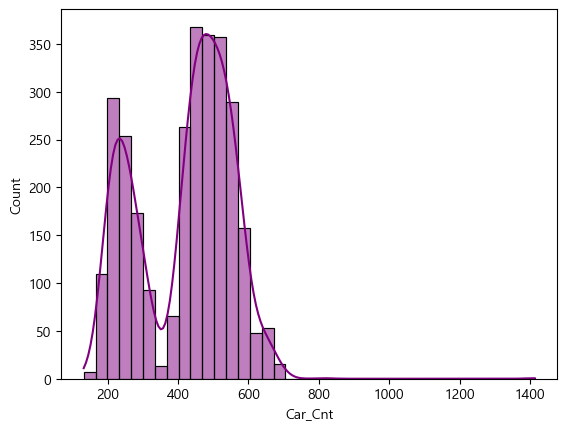


------Request_Cnt열의 정보통계량------
count    2922.000000
mean     3925.607803
std      1509.741713
min       527.000000
25%      2162.500000
50%      4720.500000
75%      5110.000000
max      6182.000000
Name: Request_Cnt, dtype: float64


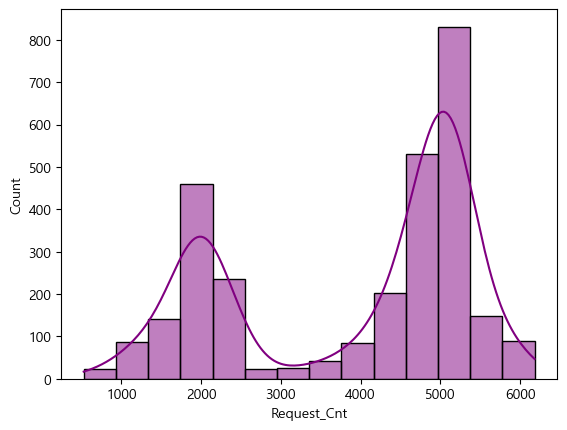


------Ride_Cnt열의 정보통계량------
count    2922.000000
mean     3283.895277
std      1249.165876
min       462.000000
25%      1779.000000
50%      3932.500000
75%      4241.000000
max      5189.000000
Name: Ride_Cnt, dtype: float64


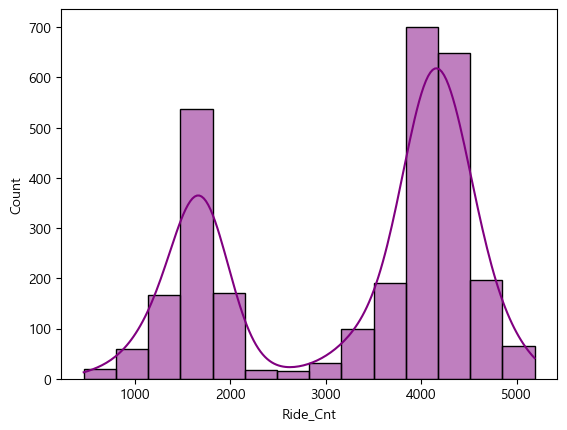


------Avg_Waiting_Time열의 정보통계량------
count    2922.000000
mean       40.305681
std        14.098550
min        17.200000
25%        29.600000
50%        38.200000
75%        48.600000
max        96.100000
Name: Avg_Waiting_Time, dtype: float64


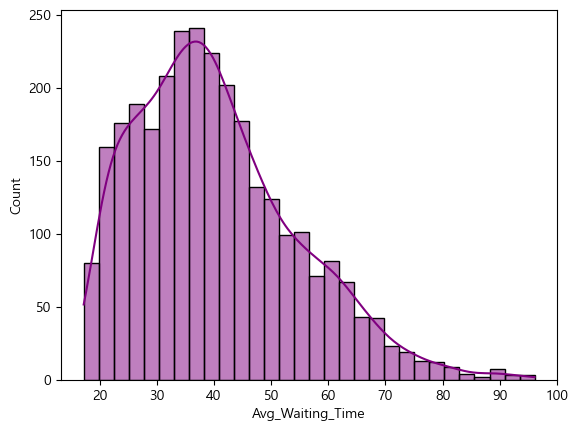


------Avg_Fare열의 정보통계량------
count    2922.000000
mean     2304.272416
std       107.260080
min      2131.000000
25%      2228.000000
50%      2257.000000
75%      2400.750000
max      2733.000000
Name: Avg_Fare, dtype: float64


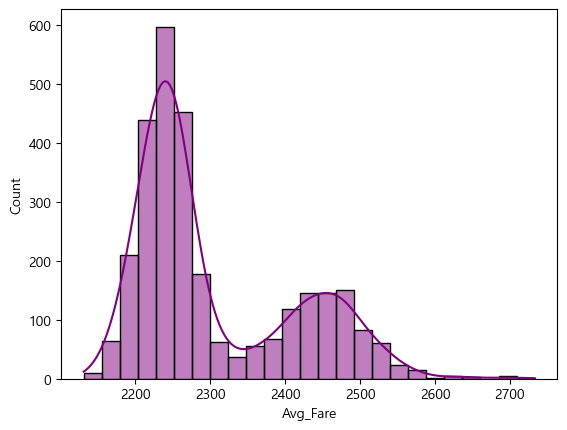


------Avg_Distance열의 정보통계량------
count     2922.000000
mean      9253.500000
std       1019.198152
min       7672.000000
25%       8521.000000
50%       8821.500000
75%      10153.000000
max      14136.000000
Name: Avg_Distance, dtype: float64


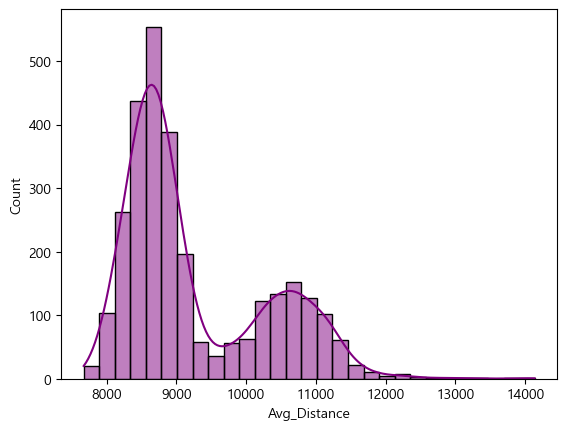


------Next_AVG_Waiting_Time열의 정보통계량------
count    2922.000000
mean       40.309274
std        14.095526
min        17.200000
25%        29.600000
50%        38.200000
75%        48.600000
max        96.100000
Name: Next_AVG_Waiting_Time, dtype: float64


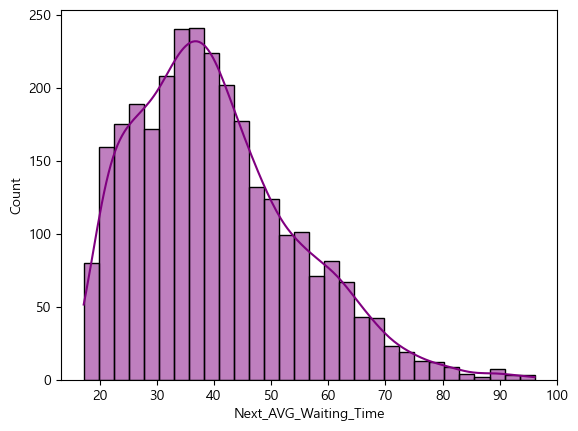


------temp_max열의 정보통계량------
count    2922.000000
mean       18.069713
std        10.712895
min       -11.200000
25%         9.000000
50%        19.650000
75%        27.400000
max        39.400000
Name: temp_max, dtype: float64


C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


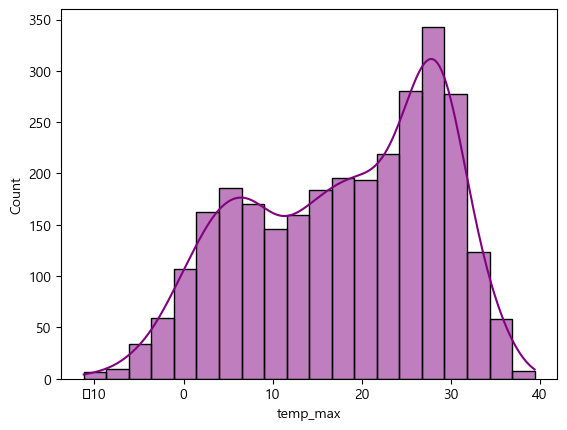


------temp_min열의 정보통계량------
count    2922.000000
mean        9.409890
std        10.785831
min       -18.500000
25%         0.500000
50%        10.000000
75%        18.900000
max        30.400000
Name: temp_min, dtype: float64


C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


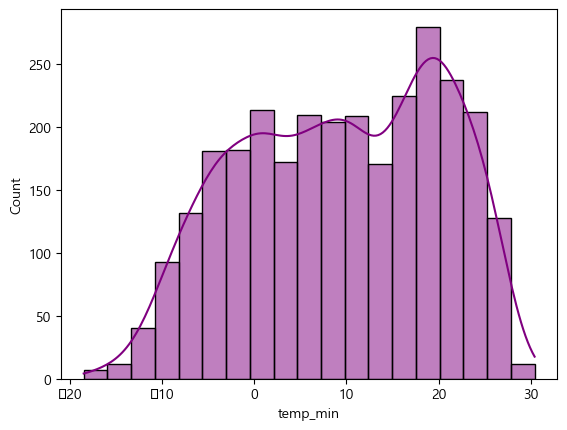


------rain(mm)열의 정보통계량------
count    2922.000000
mean        3.355613
std        12.595804
min         0.000000
25%         0.000000
50%         0.000000
75%         0.300000
max       178.900000
Name: rain(mm), dtype: float64


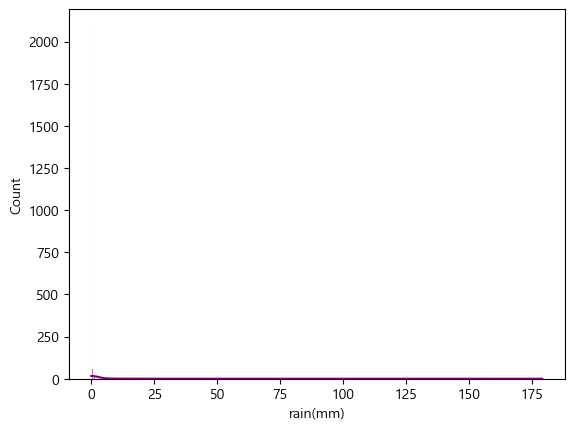


------humidity_max(%)열의 정보통계량------
count    2922.000000
mean       79.099589
std        14.023871
min        29.000000
25%        70.000000
50%        82.000000
75%        90.000000
max       100.000000
Name: humidity_max(%), dtype: float64


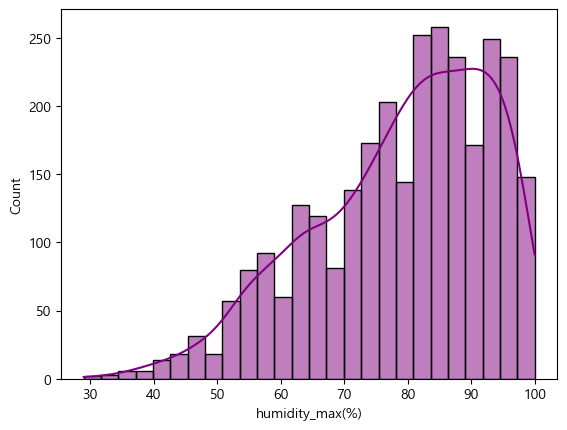


------humidity_min(%)열의 정보통계량------
count    2922.000000
mean       41.127926
std        16.405214
min         7.000000
25%        29.000000
50%        39.000000
75%        51.000000
max        98.000000
Name: humidity_min(%), dtype: float64


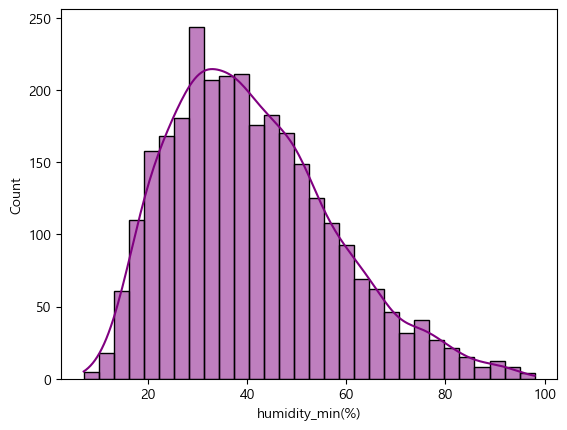


------sunshine(MJ/m2)열의 정보통계량------
count    2922.000000
mean       13.493073
std         6.944342
min         0.000000
25%         8.232500
50%        12.670000
75%        18.580000
max        30.790000
Name: sunshine(MJ/m2), dtype: float64


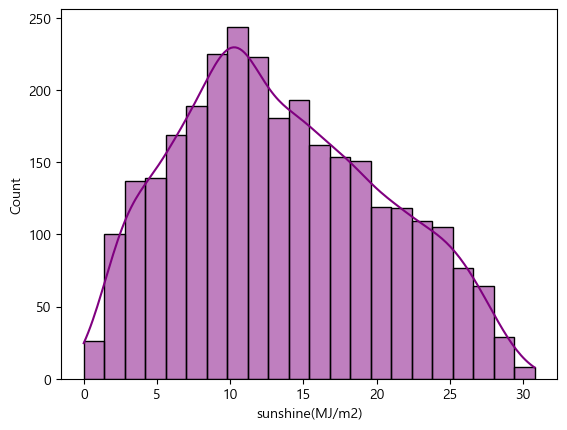


------Riding_Rate열의 정보통계량------
count    2922.000000
mean        0.841576
std         0.052172
min         0.597000
25%         0.806000
50%         0.845650
75%         0.877700
max         0.968800
Name: Riding_Rate, dtype: float64


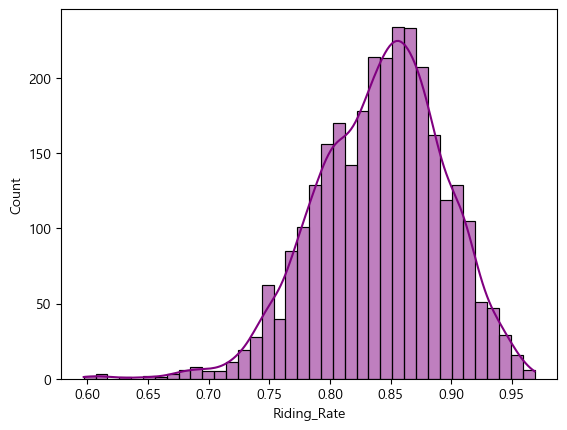


------7day_Avg_Waiting_Time열의 정보통계량------
count    2922.000000
mean       40.286448
std        12.044358
min        18.800000
25%        31.300000
50%        39.000000
75%        46.975000
max        83.900000
Name: 7day_Avg_Waiting_Time, dtype: float64


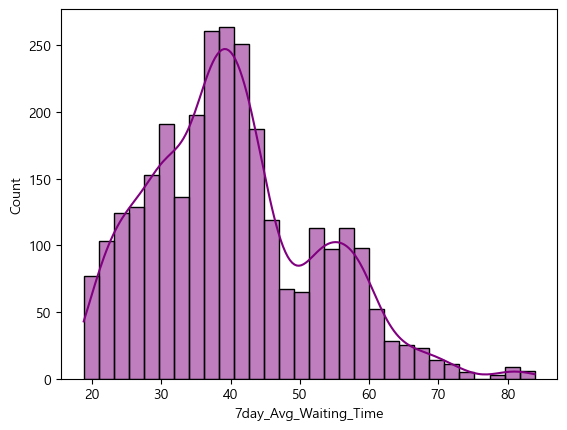

In [11]:
# 숫자형 변수 분석
columns = ['Car_Cnt', 'Request_Cnt', 'Ride_Cnt', 'Avg_Waiting_Time', 'Avg_Fare', 'Avg_Distance', 'Next_AVG_Waiting_Time', 'temp_max',
          'temp_min', 'rain(mm)', 'humidity_max(%)','humidity_min(%)', 'sunshine(MJ/m2)','Riding_Rate', '7day_Avg_Waiting_Time']

for column in columns:
    analyize(column)
    print()

### (3) 범주형 변수
* 범주형 변수들에 대해서 단변량 분석을 수행합니다.

['Sunshine_Value', 'work_rest', 'WeekDay', 'Season', 'Date', 'Year', 'Rain_Value']
------Sunshine_Value열의 정보통계량------
count       2922
unique         3
top       보통 일사량
freq        1300
Name: Sunshine_Value, dtype: object


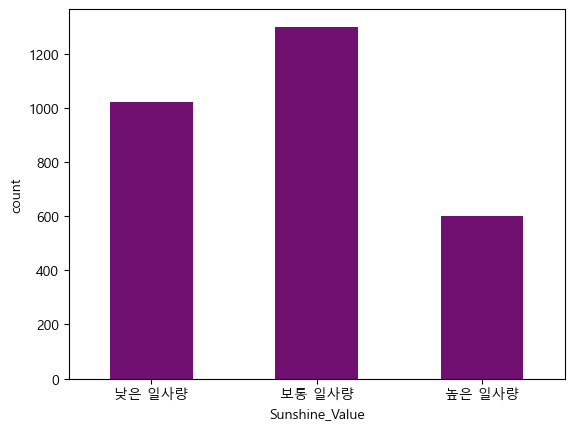


------work_rest열의 정보통계량------
count      2922
unique        2
top       일하는 날
freq       2005
Name: work_rest, dtype: object


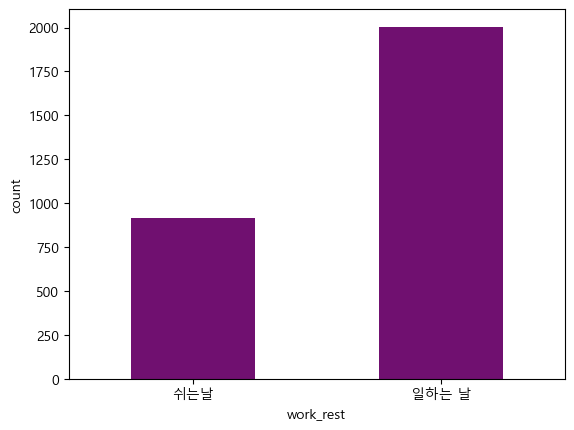


------WeekDay열의 정보통계량------
count     2922
unique       7
top          목
freq       418
Name: WeekDay, dtype: object


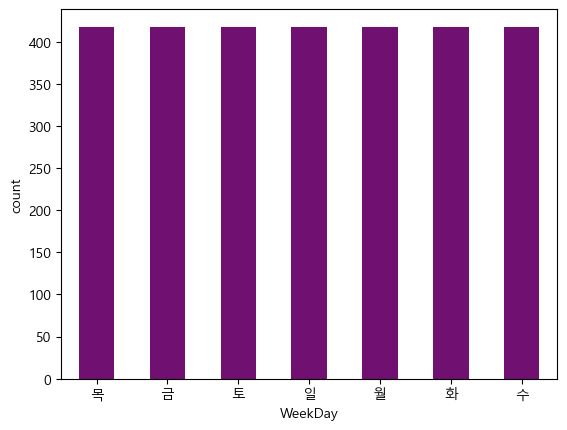


------Season열의 정보통계량------
count     2922
unique       4
top          봄
freq       736
Name: Season, dtype: object


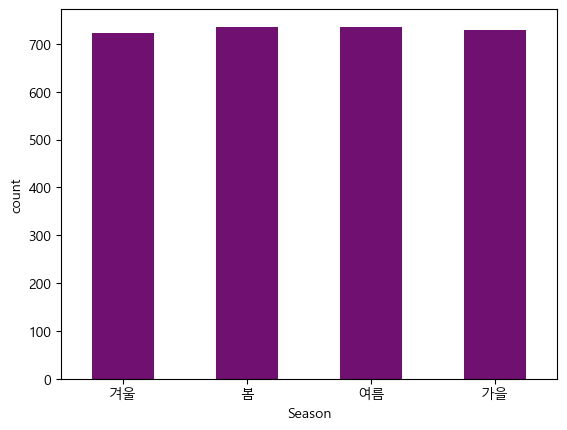


------Date열의 정보통계량------
count                    2922
unique                   2922
top       2015-01-01 00:00:00
freq                        1
first     2015-01-01 00:00:00
last      2022-12-31 00:00:00
Name: Date, dtype: object


C:\Users\user\AppData\Local\Temp\ipykernel_7980\4205129914.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df[column].describe())


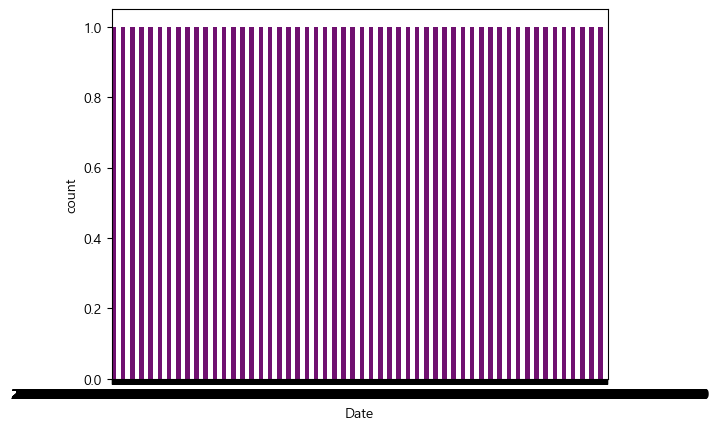


------Year열의 정보통계량------
count    2922.000000
mean     2018.499658
std         2.291531
min      2015.000000
25%      2016.250000
50%      2018.500000
75%      2020.000000
max      2022.000000
Name: Year, dtype: float64


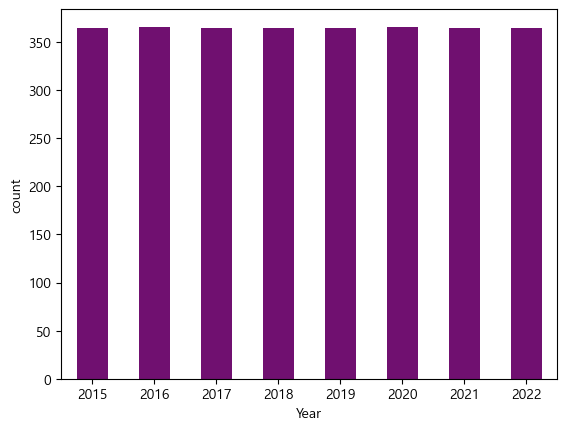


------Rain_Value열의 정보통계량------
count        2922
unique          4
top       비가 오지않음
freq         2088
Name: Rain_Value, dtype: object


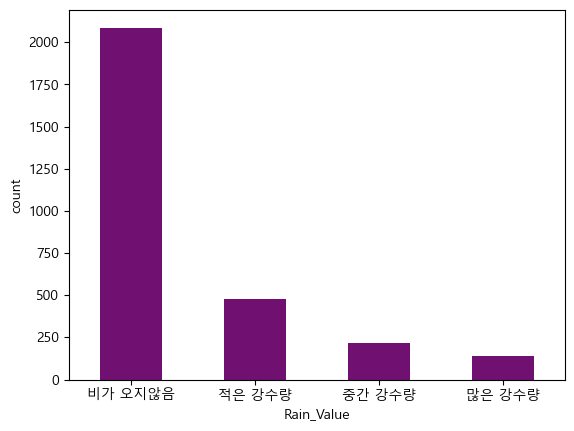

In [12]:
# 범주형 변수 분석
# set 차집합 연산을 사용하여 columns에 속하지 않은 변수만 뽑기
categories = list(set(df.columns) - set(columns))[1::1]
print(categories)

for category in categories:
    analyize2(category)
    print()

## 3.EDA 2단계 - feature와 target 비교 분석하기

* **세부요구사항**
    * 숫자 feature --> target
        * 전체 상관계수 구하고 시각화(heatmap)해서 파악해봅시다.
        * 상위 n개의 feature와 target의 상점도를 확인해봅시다.
    * 범주 feature --> target
        * 시각화 : 평균 비교 barplot
        * 수치화 : t-test, anova
    * 이번 단계에서는 함수 생성은 선택사항 입니다.

### (1) 숫자 feature --> Target
* 전체 상관계수 시각화(heatmap)
* 상위 n개 산점도 그리기

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2922 entries, 0 to 2921
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   2922 non-null   datetime64[ns]
 1   Car_Cnt                2922 non-null   int64         
 2   Request_Cnt            2922 non-null   int64         
 3   Ride_Cnt               2922 non-null   int64         
 4   Avg_Waiting_Time       2922 non-null   float64       
 5   Avg_Fare               2922 non-null   int64         
 6   Avg_Distance           2922 non-null   int64         
 7   WeekDay                2922 non-null   object        
 8   Month                  2922 non-null   int64         
 9   Year                   2922 non-null   int64         
 10  Next_AVG_Waiting_Time  2922 non-null   float64       
 11  temp_max               2922 non-null   float64       
 12  temp_min               2922 non-null   float64       
 13  rai

#### 1) 전체 상관계수 시각화

C:\Users\user\AppData\Local\Temp\ipykernel_7980\696667167.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


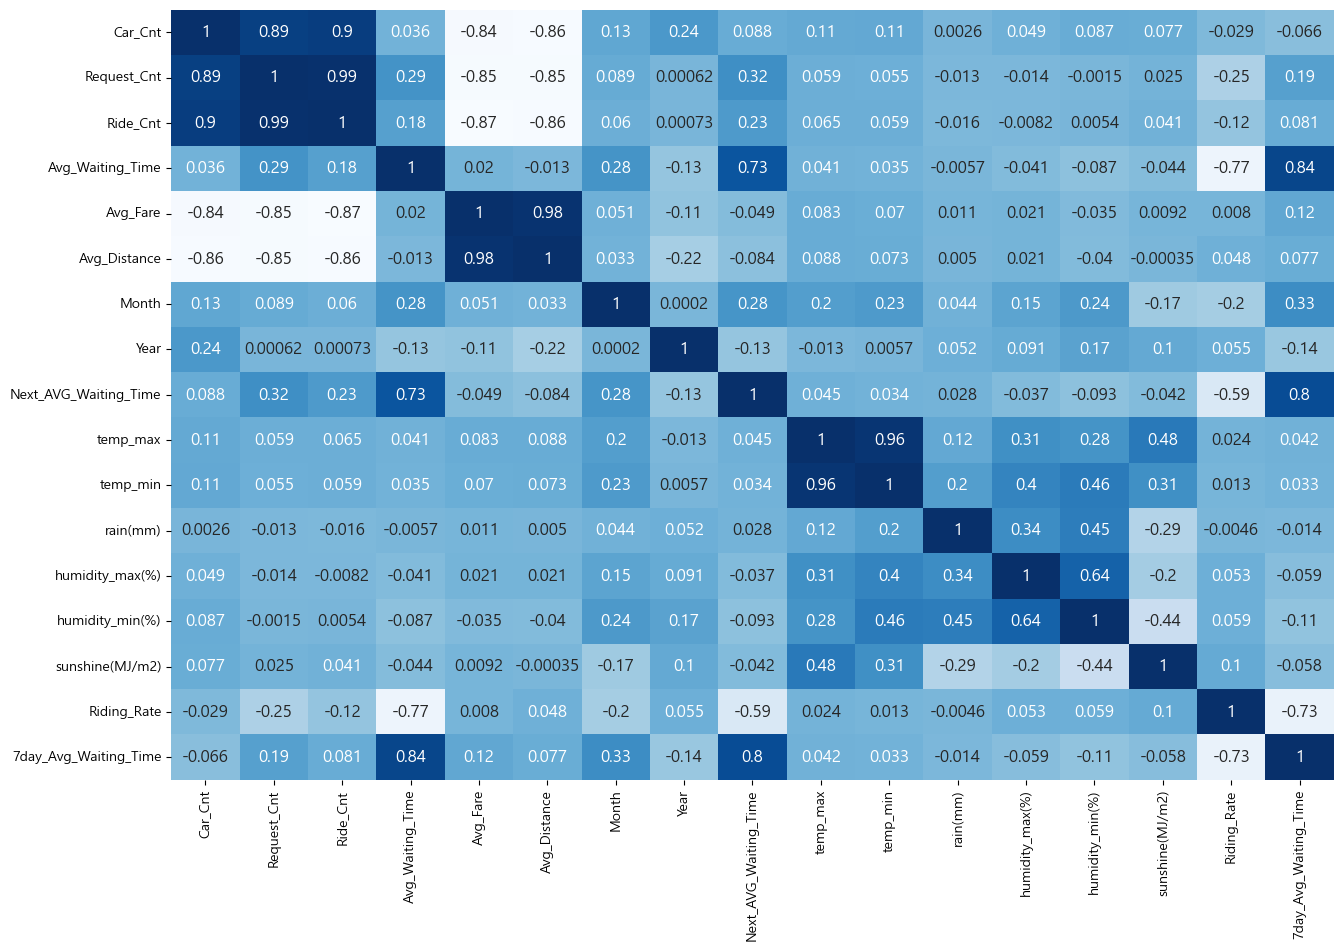

In [14]:
# 상관계수 계산
corr = df.corr()

# 상관계수 heatmap 그리기
plt.figure(figsize=(15,10))  # 크기 조절
sns.heatmap(corr, annot=True, cmap='Blues', annot_kws={"size": 12}, cbar=False,)
plt.show()

- heatmap은 x축이 숫자형, y축 숫자형일떄 지표가 의미가 있다.
- 숫자값으로 이루어지는 변수만 추출하는데, 변수 중에서도 범주형 변수로 해석되는 것이 있어서 그 점을 조심하고 신경써야 한다.
* x : Car_Cnt, Request_Cnt, Ride_Cnt, Avg_Waiting_Time, Avg_Fare, Avg_Distance, temp_max, temp_min, rain(mm), humidity_max, humidity_min<br> Sunshine, Riding_Rate, 7day_Avg_Waiting_Time
* y : Next_AVG_Waiting_Time

#### 2) 산점도

In [15]:
columns = ['Request_Cnt', 'Ride_Cnt', 'Avg_Waiting_Time', 'Riding_Rate', '7day_Avg_Waiting_Time']

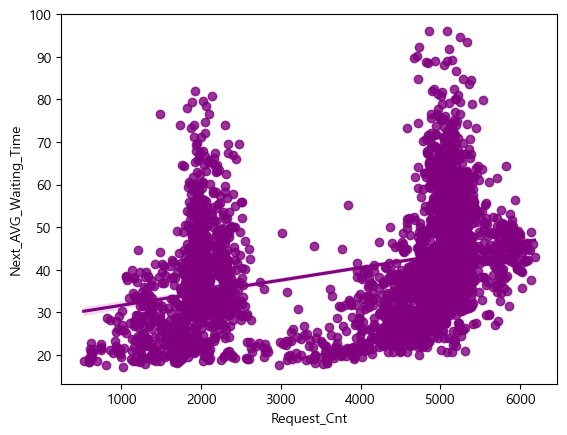

PearsonRResult(statistic=0.3162822498236501, pvalue=6.880088152034076e-69)

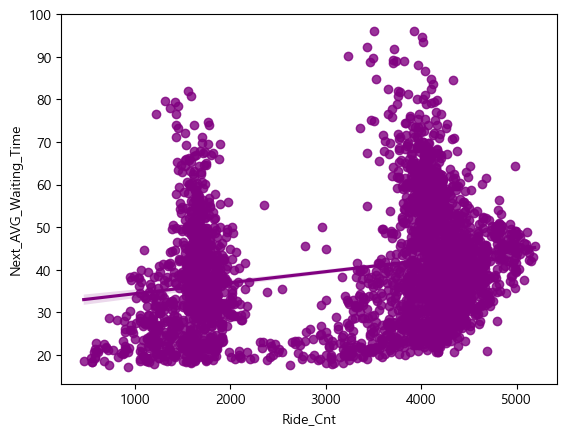

PearsonRResult(statistic=0.2292532723587576, pvalue=3.7473829085525984e-36)

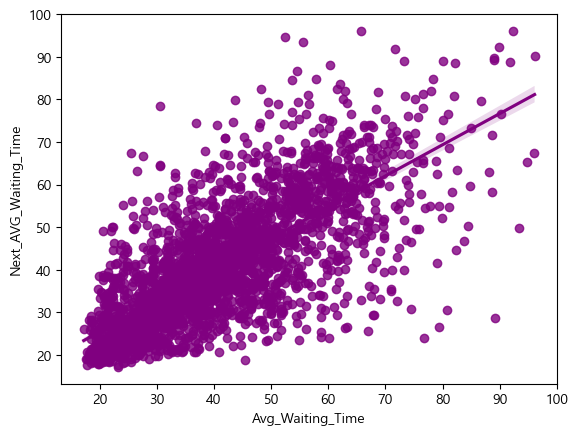

PearsonRResult(statistic=0.7323194257982135, pvalue=0.0)

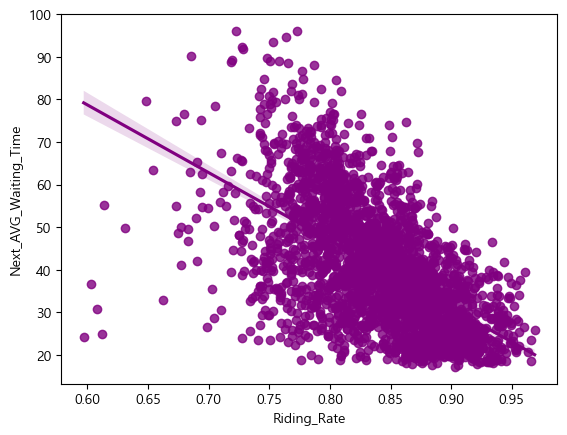

PearsonRResult(statistic=-0.588740489690797, pvalue=3.512594236575448e-272)

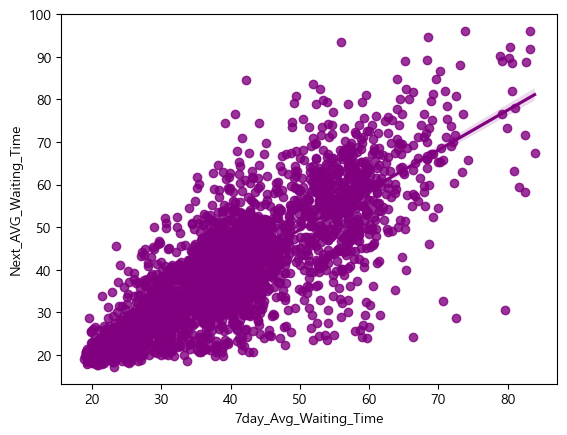

PearsonRResult(statistic=0.7999795809204215, pvalue=0.0)

In [16]:
for column in columns:
    sns.regplot(x=df[column], y=df['Next_AVG_Waiting_Time'], color='purple')
    plt.show()
    display(spst.pearsonr(df[column], y=df['Next_AVG_Waiting_Time']))

### (2) 범주 feature --> Target

* 범주형 변수들과 target 간의 관계를 살펴봅시다.
    * 시각화 : 평균비교 barplot
    * 수치화 : t-검정, anova

In [17]:
columns = ['Year', 'WeekDay', 'Sunshine_Value', 'work_rest', 'Season', 'Rain_Value', 'Month']

In [18]:
# 특제 함수
def function(column):
    # 시각화
    sns.barplot(x=df[column], y=df['Next_AVG_Waiting_Time'], width=0.5, color='purple')
    plt.xticks(rotation=90)
    plt.show()
    
    # 'work_rest'만 t-검정
    if column == 'work_rest':
        work = df.loc[df['work_rest'] == '쉬는날', 'Next_AVG_Waiting_Time']
        rest = df.loc[df['work_rest'] == '일하는 날', 'Next_AVG_Waiting_Time']
        display(spst.ttest_ind(work, rest))
    # 나머지 컬럼 anova
    else:
        result = []
        for element in df[column].unique():
            result.append(df.loc[df[column] == element, 'Next_AVG_Waiting_Time'])
        display(spst.f_oneway(*result))

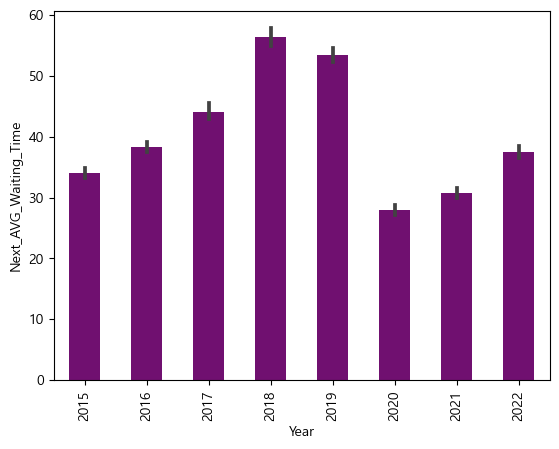

F_onewayResult(statistic=361.0792597034928, pvalue=0.0)

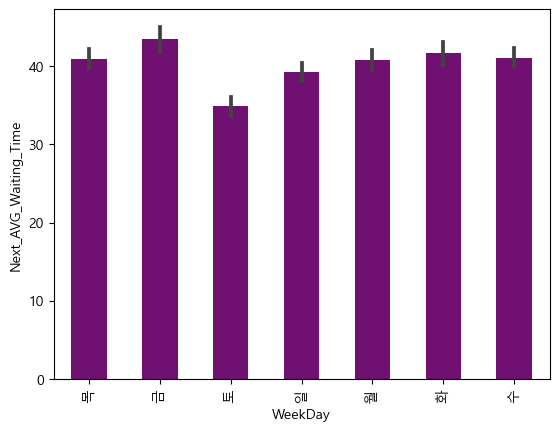

F_onewayResult(statistic=15.751468417474483, pvalue=6.961966308136947e-18)

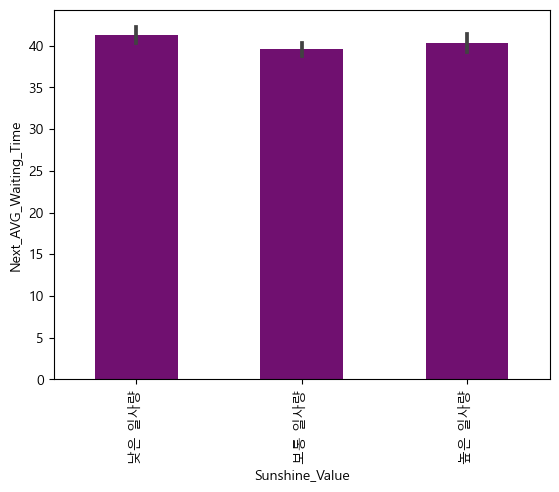

F_onewayResult(statistic=4.204261882540222, pvalue=0.015022322006234514)

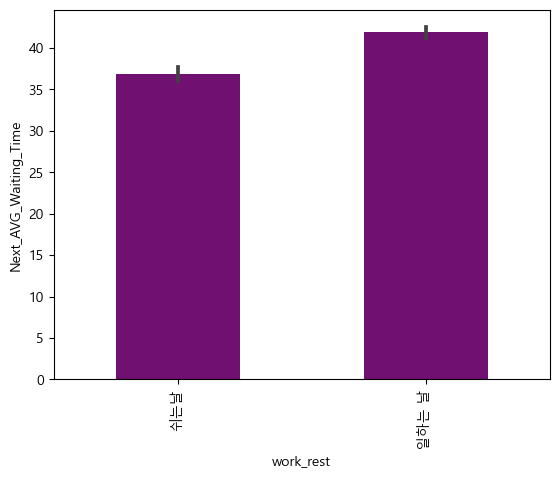

Ttest_indResult(statistic=-9.081110746306464, pvalue=1.9298268746630425e-19)

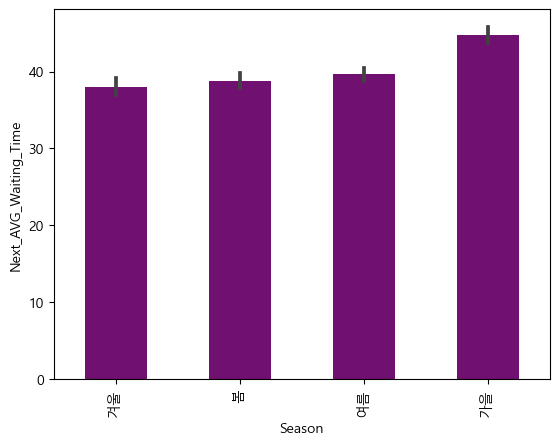

F_onewayResult(statistic=35.07940475582562, pvalue=2.8824417183702753e-22)

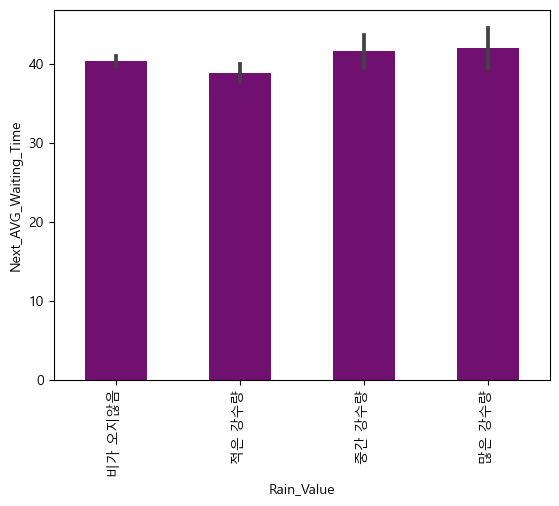

F_onewayResult(statistic=3.0802901537613407, pvalue=0.026409991584474556)

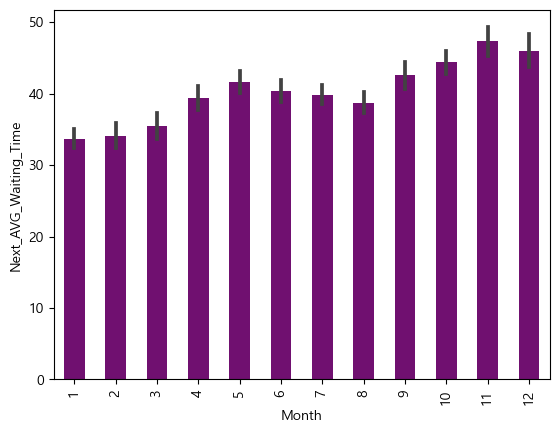

F_onewayResult(statistic=25.986234807972142, pvalue=4.025871362738365e-52)

In [19]:
for column in columns:
    function(column)
    print()

# 남겨둘 변수
* Year, WeekDay, Season

## 4.변수 정리

* Target과 관련성이 높은 feature와 그렇지 않은 feature를 정리합니다.
* 여기서의 판단은 다소 주관적입니다. 조금 정확하지 않아도 괜찮습니다.
* 다음 단계 모델링에서 관련이 적은 변수는 포함시키거나, 제외를 고려할때 활용합니다.

### 이 변수들만 모델링할 떄 쓰이는 변수입니다.
* Avg_Waiting_Time(0.73), Riding_Rate(-0.59), 7day_Avg_Waiting_Time(0.8)
*  Year, WeekDay, Season

* 강한 관계의 변수

* 중간(약한) 관계의 변수

* (거의) 관계가 없는 변수

## 5.데이터 저장

* **세부 요구사항**
    * 혹시 데이터에 변경이 발생할 수 있으니, 저장해 놓읍시다.
    * joblib.dump를 이용하시오.
    * 저장할 파일 이름 : data2.pkl

In [20]:
from joblib import dump
dump(df, 'data2.pkl')

['data2.pkl']